# **Bank Client Attributes and Marketing Outcomes**

In [1]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.1.2 scipy==1.9.1 missingpy==0.2.0

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 740.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 27.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.15 requires scipy>=1.10.0, but you have scipy 1.9.1 which is 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

In [3]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### 1. Importar el dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/TFM - Grup 8/Assignment-2_Data.csv", delimiter=",")

In [5]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2. Exploración inicial

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


*El* dataset presenta 45211 observaciones y 18 variables. Hay sólo 3 variables con valores nulos: age, job, balance. A continuación, vamos a investigar los valores de estas tres variables.

In [7]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Descripción estadística de las columnas numéricas

### 3. Valores Nulos

**Age**

In [8]:
df['age'].unique()

array([nan, 47., 33., 35., 28., 58., 43., 41., 29., 53., 57., 51., 45.,
       60., 56., 32., 25., 40., 44., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 31., 42., 30., 27., 34., 38., 23., 26., 61.,
       22., 24., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64.,
       69., 72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80.,
       94., 79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.,
       -1.])

In [9]:
df.loc[(df['age'].isnull())|(df['age']<18)]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
53,1054,NaN,admin.,single,secondary,no,-76.0,yes,no,unknown,5,may,787,1,-1,0,unknown,no
54,1055,NaN,technician,single,secondary,no,-103.0,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
55,1056,NaN,entrepreneur,single,tertiary,no,243.0,no,yes,unknown,5,may,174,1,-1,0,unknown,no
56,1057,NaN,management,single,tertiary,no,424.0,yes,no,unknown,5,may,104,1,-1,0,unknown,no
57,1058,NaN,blue-collar,married,unknown,no,306.0,yes,no,unknown,5,may,13,1,-1,0,unknown,no
58,1059,NaN,blue-collar,single,unknown,no,24.0,yes,no,unknown,5,may,185,1,-1,0,unknown,no


Esta variable contiene contiene 12 observaciones con un valor nulo en edad y 3 observaciones que presentan un -1. El último valor podría ser debido a un error en el sistema a la hora de almazenar los datos o simplemente los clientes no han querido informar de la edad, este valor debería ser interpretado como nulo, ya que no existen clientes con edades negativas. A la hora de tratar estos 2 valores, teniendo en cuenta que la edad es una variable muy significativa de la información del cliente y sólo hay 15 registros con edad nula, procedemos a eliminar la información de estos clientes.

In [10]:
df[df["balance"].isna()]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Job**

In [11]:
df['job'].unique()

array(['management', nan, 'entrepreneur', 'blue-collar', 'unknown',
       'retired', 'technician', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
df.loc[(df['job'].isnull())]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no


Hay un total de 12 valores distintos dentro de la variable job, sin tener en cuenta el valor nulo. Estos valores representan, la posición laboral en la que se encuentra cada cliente y puede ser desde estudiante, jubilado o desconocido. Si observamos el único valor nulo que tenemos de trabajo, vemos que es una observación que tampoco tiene edad, por lo que eliminando los valores nulos de la variable age también eliminamos este valor.

**Balance**

In [13]:
df['balance'].unique()

array([2.1430e+03, 2.9000e+01, 2.0000e+00, ..., 8.2050e+03, 1.4204e+04,
       1.6353e+04])

In [14]:
df.loc[(df['balance'].isnull())]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Hay un total de 3 registros con un valor nulo en la variable balance. La primera fila de todas se va a eliminar a la hora de eliminar aquellos registros con edad nulo. No obstante, los dos restantes pueden ser considerados como 0 ya que al ser valor nulo puede ser que se traten de clientes que no tienen productos o cuenta bancaria en el banco en concreto, y por esa razón no se sabe el dinero que tienen ahorrado.

Procedemos a eliminar las observaciones con edad nula e incluimos un balance de
0 a aquellas con valores nulos.

In [15]:
df = df.loc[~(df['age'].isnull() | (df['age'] == -1))]
df.loc[df['balance'].isnull(), 'balance'] = 0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45196 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45196 non-null  int64  
 1   age        45196 non-null  float64
 2   job        45196 non-null  object 
 3   marital    45196 non-null  object 
 4   education  45196 non-null  object 
 5   default    45196 non-null  object 
 6   balance    45196 non-null  float64
 7   housing    45196 non-null  object 
 8   loan       45196 non-null  object 
 9   contact    45196 non-null  object 
 10  day        45196 non-null  int64  
 11  month      45196 non-null  object 
 12  duration   45196 non-null  int64  
 13  campaign   45196 non-null  int64  
 14  pdays      45196 non-null  int64  
 15  previous   45196 non-null  int64  
 16  poutcome   45196 non-null  object 
 17  y          45196 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


En el resumen anterior, observamos que tenemos 15 observaciones menos. No obstante, no hay ninguna variable con valores nulos.

In [17]:
new_df = df
n = len(new_df)
new_df.replace("unknown", pd.NA, inplace=True)

missing_values_rows = 0
for i in range(n):
    if new_df.iloc[i].isna().sum() > 0:
        missing_values_rows += 1

print("Filas con valores missing:", missing_values_rows)
print("Porcentaje de filas con valores missing:", round(missing_values_rows/n*100, 2))

Filas con valores missing: 37355
Porcentaje de filas con valores missing: 82.65


Veamos columna por columna

In [18]:
import pandas as pd
new_df2 = df.replace("unknown", pd.NA)

missing_values_per_column = new_df2.isna().sum()

percentage_missing_per_column = (missing_values_per_column / len(new_df2)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values_per_column,
    'Percentage Missing': percentage_missing_per_column.round(2)
})

missing_summary[missing_summary["Missing Values"]>0]


,Missing Values,Percentage Missing
job,288,0.64
education,1855,4.10
contact,13008,28.78
poutcome,36945,81.74


Los valores nulos en la columna poutcome, corresponden a aquellos clientes que no fueron contactados en la campaña anterior. Los cambiamos por not_contacted

In [19]:
df["poutcome"] = df["poutcome"].fillna('not_contacted')

In [20]:
df.groupby(["contact"]).count()["Id"]

,Id
contact,
cellular,29282
telephone,2906


La variable contact no nos parece relevante y no la usaremos para la construcción del modelo debido a la gran cantidad de valores nulos y la información que proporciona. Además, más del 90% de los registros están en una de las dos clases.

In [21]:
del df["contact"]

In [22]:
df.groupby(["education"]).count()["Id"]

,Id
education,
primary,6850
secondary,23196
tertiary,13295


In [23]:
df.groupby(["job"]).count()["Id"]

,Id
job,
admin.,5169
blue-collar,9730
entrepreneur,1484
housemaid,1240
management,9456
retired,2263
self-employed,1579
services,4153
student,937


In [24]:
df.replace("unknown", np.nan, inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[df['age'] < 0, 'age'] = np.nan

df_subset = df[['age', 'balance']]

imputer = MissForest()

df_subset_imputed = imputer.fit_transform(df_subset)

df_subset_imputed = pd.DataFrame(df_subset_imputed, columns=df_subset.columns)

df[['age', 'balance']] = round(df_subset_imputed,0)



/usr/local/lib/python3.10/dist-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


In [25]:
df.groupby(["education", "job"]).count()[["Id"]]

Id
education job                
primary   admin.          209
          blue-collar    3758
          entrepreneur    183
          housemaid       627
          management      294
          retired         795
          self-employed   130
          services        344
          student          44
          technician      158
          unemployed      257
secondary admin.         4218
          blue-collar    5371
          entrepreneur    541
          housemaid       395
          management     1121
          retired         983
          self-employed   577
          services       3457
          student         508
          technician     5226
          unemployed      728
tertiary  admin.          571
          blue-collar     149
          entrepreneur    684
          housemaid       173
          management     7799
          retired         366
          self-employed   833
          services        202
          student         222
          technician     1968
          unemployed      289

In [26]:
df.groupby(['job', "age"])['education'].count()

job         age 
admin.      18.0     1
            19.0     2
            20.0     7
            21.0     7
            22.0    16
                    ..
unemployed  73.0     1
            74.0     1
            76.0     2
            77.0     1
            78.0     2
Name: education, Length: 708, dtype: int64

Inferir el valor con la moda por grupo en la educación

In [27]:
df['education'] = df.groupby(['job', 'age'])['education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [28]:
df.iloc[53: 62]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
65,1066,55.0,management,married,tertiary,no,91.0,yes,no,5,may,91,1,-1,0,not_contacted,no
66,1067,49.0,retired,married,tertiary,no,0.0,no,no,5,may,528,1,-1,0,not_contacted,no
67,1068,55.0,management,divorced,tertiary,no,1.0,yes,no,5,may,273,1,-1,0,not_contacted,no
68,1069,45.0,technician,married,secondary,no,206.0,yes,no,5,may,158,2,-1,0,not_contacted,no
69,1070,47.0,blue-collar,single,secondary,no,164.0,yes,yes,5,may,177,1,-1,0,not_contacted,no
70,1071,42.0,blue-collar,married,secondary,no,690.0,yes,yes,5,may,258,1,-1,0,not_contacted,no
71,1072,59.0,services,married,secondary,no,2343.0,yes,yes,5,may,172,1,-1,0,not_contacted,no
72,1073,46.0,management,married,secondary,no,137.0,yes,yes,5,may,154,1,-1,0,not_contacted,no
73,1074,51.0,blue-collar,married,primary,no,173.0,yes,no,5,may,291,1,-1,0,not_contacted,no


In [29]:
df.iloc[7: 10]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
11,1012,51.0,admin.,single,secondary,no,229.0,yes,no,5,may,137,1,-1,0,not_contacted,no
12,1013,45.0,technician,married,secondary,no,13.0,yes,no,5,may,517,1,-1,0,not_contacted,no
13,1014,57.0,technician,married,secondary,no,52.0,yes,no,5,may,71,1,-1,0,not_contacted,no


In [30]:
new_df2 = df.replace("unknown", pd.NA)

missing_values_per_column = new_df2.isna().sum()

percentage_missing_per_column = (missing_values_per_column / len(new_df2)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values_per_column,
    'Percentage Missing': percentage_missing_per_column.round(2)
})

missing_summary[missing_summary["Missing Values"]>0]

,Missing Values,Percentage Missing
age,12,0.03
job,288,0.64
education,304,0.67
balance,12,0.03


In [31]:
df = df.dropna().reset_index(drop=True)

In [32]:
df

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,1004,28.0,blue-collar,married,secondary,no,447.0,yes,no,5,may,92,1,-1,0,not_contacted,no
1,1006,43.0,management,married,tertiary,no,0.0,yes,no,5,may,139,1,-1,0,not_contacted,no
2,1007,41.0,management,single,tertiary,no,270.0,yes,yes,5,may,217,1,-1,0,not_contacted,no
3,1009,53.0,retired,married,primary,no,6.0,yes,no,5,may,50,1,-1,0,not_contacted,no
4,1010,58.0,technician,single,secondary,no,71.0,yes,no,5,may,55,1,-1,0,not_contacted,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44887,46192,51.0,retired,divorced,tertiary,no,825.0,yes,no,16,nov,262,1,183,1,failure,yes
44888,46193,71.0,management,single,tertiary,no,1729.0,no,no,16,nov,238,1,-1,0,not_contacted,yes
44889,46194,72.0,self-employed,single,tertiary,no,5715.0,no,no,16,nov,449,2,33,4,success,yes
44890,46195,57.0,management,married,tertiary,no,668.0,yes,yes,16,nov,162,2,187,5,failure,no


Para el resto de nulos eliminamos los registros

### 4. Duplicados

In [33]:
df.duplicated().sum()

0

In [34]:
df['Id'].duplicated().sum()

0

No hay ninguna fila duplicada y todos los ids de los clientes son únicos.

### 5. Tipos de datos

In [35]:
df.dtypes

,0
Id,int64
age,float64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
day,int64


In [36]:
df['age'] = df['age'].astype(int)

La edad aparece como float, debería ser un número entero ya que representa los años de cada cliente.

### 6. Outliers

In [37]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,44892.000000,44892.000000,44892.000000,44892.000000,44892.000000,44892.000000,44892.000000,44892.000000
mean,23608.275261,40.915553,1360.012809,15.816693,258.156732,2.761049,40.316315,0.581351
std,13044.360165,10.606267,3043.487531,8.320618,257.507071,3.093653,100.248432,2.308220
min,1004.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12315.750000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23634.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34906.250000,48.000000,1423.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46196.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Age**

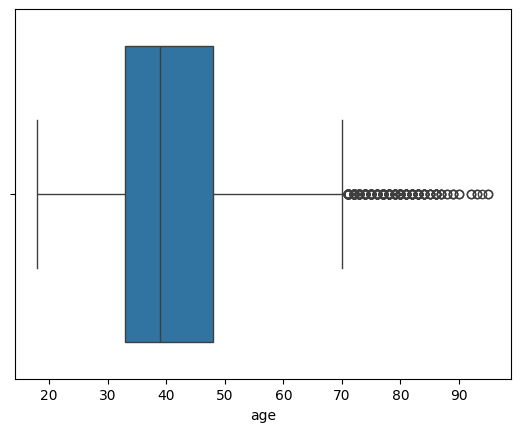

In [38]:
sns.boxplot(x=df['age'])
plt.show()

In [39]:
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
df[((df['age'] < (df['age'].quantile(0.25) - 1.5 * IQR)) | (df['age'] > (df['age'].quantile(0.75) + 1.5 * IQR)))]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
28927,30147,83,services,married,secondary,no,425.0,yes,no,2,feb,109,1,252,2,other,no
29030,30250,75,management,divorced,tertiary,no,46.0,no,no,2,feb,521,1,-1,0,not_contacted,yes
29032,30252,75,services,married,secondary,no,3324.0,no,no,2,feb,429,2,-1,0,not_contacted,no
29091,30311,83,admin.,single,secondary,no,6236.0,yes,yes,2,feb,751,2,76,4,failure,yes
29629,30854,75,management,married,tertiary,no,3881.0,yes,no,4,feb,80,2,-1,0,not_contacted,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44828,46130,77,technician,married,tertiary,no,397.0,no,no,27,oct,171,1,91,2,success,yes
44849,46152,71,management,single,tertiary,no,2064.0,yes,yes,9,nov,255,3,378,2,failure,no
44876,46180,75,technician,married,secondary,no,3810.0,no,no,12,nov,319,1,100,6,failure,no
44888,46193,71,management,single,tertiary,no,1729.0,no,no,16,nov,238,1,-1,0,not_contacted,yes


Se observan 486 clientes con edades atípicas.

**Balance**

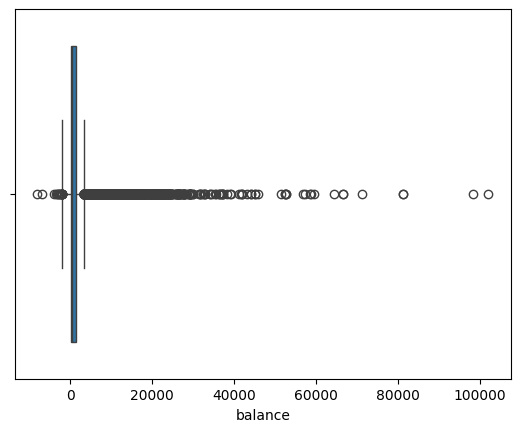

In [40]:
sns.boxplot(x=df['balance'])
plt.show()

In [41]:
IQR = df['balance'].quantile(0.75) - df['balance'].quantile(0.25)
df[((df['balance'] < (df['balance'].quantile(0.25) - 1.5 * IQR)) | (df['balance'] > (df['balance'].quantile(0.75) + 1.5 * IQR)))]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
25,1031,51,technician,married,secondary,no,10635.0,no,yes,5,may,225,1,-1,0,not_contacted,no
161,1175,40,admin.,divorced,secondary,no,4384.0,yes,no,5,may,130,1,-1,0,not_contacted,no
162,1176,54,admin.,divorced,secondary,no,4080.0,yes,no,5,may,412,1,-1,0,not_contacted,no
180,1194,50,admin.,married,secondary,no,5699.0,yes,no,5,may,67,1,-1,0,not_contacted,no
308,1323,45,management,married,secondary,no,24598.0,yes,no,5,may,224,3,-1,0,not_contacted,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44850,46153,35,housemaid,married,primary,no,4655.0,no,no,9,nov,335,1,92,13,failure,no
44866,46170,46,management,married,tertiary,no,6879.0,yes,no,10,nov,182,1,229,2,failure,no
44870,46174,60,admin.,single,tertiary,no,4256.0,no,no,11,nov,118,4,104,7,failure,no
44876,46180,75,technician,married,secondary,no,3810.0,no,no,12,nov,319,1,100,6,failure,no


Se observan 4729 clientes con un balance atípico en su cuenta.

**Duration**

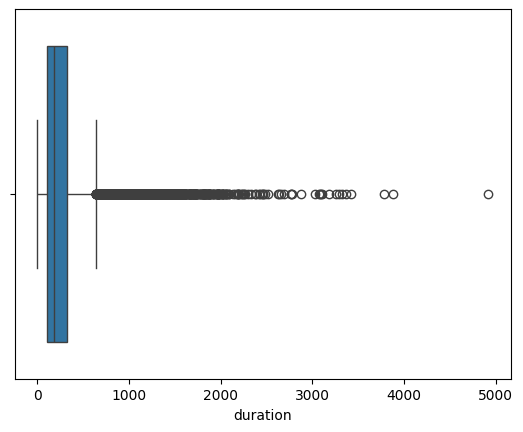

In [42]:
sns.boxplot(x=df['duration'])
plt.show()

In [43]:
IQR = df['duration'].quantile(0.75) - df['duration'].quantile(0.25)
df[((df['duration'] < (df['duration'].quantile(0.25) - 1.5 * IQR)) | (df['duration'] > (df['duration'].quantile(0.75) + 1.5 * IQR)))]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
32,1038,50,technician,married,secondary,no,49.0,no,no,5,may,1666,1,-1,0,not_contacted,no
38,1044,44,retired,married,secondary,no,0.0,yes,no,5,may,1492,1,-1,0,not_contacted,no
48,1062,55,technician,divorced,secondary,no,23.0,yes,no,5,may,812,1,-1,0,not_contacted,no
70,1084,36,admin.,married,secondary,no,101.0,yes,no,5,may,1042,1,-1,0,not_contacted,yes
73,1087,39,admin.,married,secondary,no,0.0,no,no,5,may,1467,1,-1,0,not_contacted,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44771,46073,29,management,divorced,tertiary,no,455.0,no,no,21,oct,1032,1,91,4,success,yes
44772,46074,25,management,married,tertiary,no,325.0,no,no,21,oct,759,1,90,5,success,yes
44782,46084,77,entrepreneur,married,secondary,no,2693.0,no,no,22,oct,738,3,183,1,success,yes
44784,46086,61,technician,single,secondary,no,10861.0,no,no,22,oct,716,3,-1,0,not_contacted,yes


Se observan 3288 clientes con una duración de contacto muy elevada.

**Day**

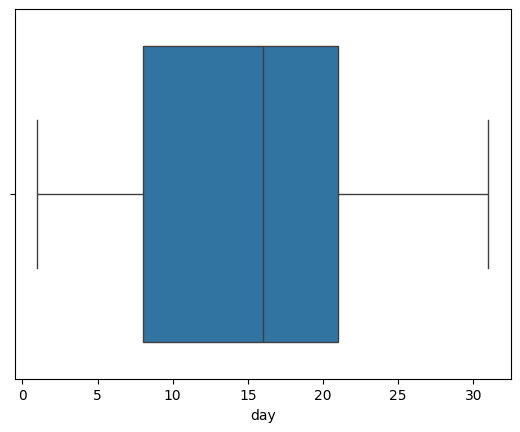

In [44]:
sns.boxplot(x=df['day'])
plt.show()

In [45]:
IQR = df['day'].quantile(0.75) - df['day'].quantile(0.25)
df[((df['day'] < (df['day'].quantile(0.25) - 1.5 * IQR)) | (df['day'] > (df['day'].quantile(0.75) + 1.5 * IQR)))]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y


**Campaign**

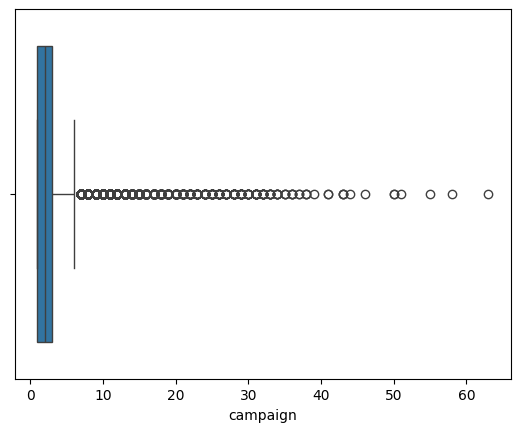

In [46]:
sns.boxplot(x=df['campaign'])
plt.show()

In [47]:
IQR = df['campaign'].quantile(0.75) - df['campaign'].quantile(0.25)
df[((df['campaign'] < (df['campaign'].quantile(0.25) - 1.5 * IQR)) | (df['campaign'] > (df['campaign'].quantile(0.75) + 1.5 * IQR)))]

,Id,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
743,1759,42,services,married,secondary,no,0.0,yes,yes,6,may,250,7,-1,0,not_contacted,no
765,1781,40,admin.,married,secondary,no,407.0,no,no,7,may,172,8,-1,0,not_contacted,no
890,1907,38,services,single,secondary,no,5.0,yes,no,7,may,388,7,-1,0,not_contacted,no
1086,2104,59,technician,married,secondary,no,137.0,yes,no,7,may,253,8,-1,0,not_contacted,no
1088,2106,50,admin.,married,tertiary,no,149.0,yes,no,7,may,244,7,-1,0,not_contacted,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44369,45667,60,technician,single,secondary,no,12980.0,no,no,2,sep,206,7,94,2,other,no
44383,45681,43,self-employed,single,tertiary,no,1707.0,no,no,3,sep,543,9,465,2,failure,no
44470,45771,42,services,single,tertiary,no,900.0,no,no,13,sep,323,9,199,4,other,yes
44586,45887,24,management,married,tertiary,no,393.0,no,no,24,sep,246,12,197,6,failure,no


### 7. Histogramas

In [48]:
def plot_histogram(column, threshold=3):
    mean_val = df[column].mean()
    std_dev = df[column].std()

    lower_threshold = mean_val - threshold * std_dev
    upper_threshold = mean_val + threshold * std_dev

    filtered_data = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

    plt.figure(figsize=(10, 6))
    filtered_data[column].hist(bins=30, color='salmon')

    plt.title(f'Histograma de {column.upper()} (excluyendo outliers)')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Para poder visualizar los histogramas de forma más clara se han eliminado los valores atípicos alejados a más de 3 desviaciones típicas.

In [49]:
#Seleccionar las columnas numéricas
df.select_dtypes(include=['number']).columns

Index(['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

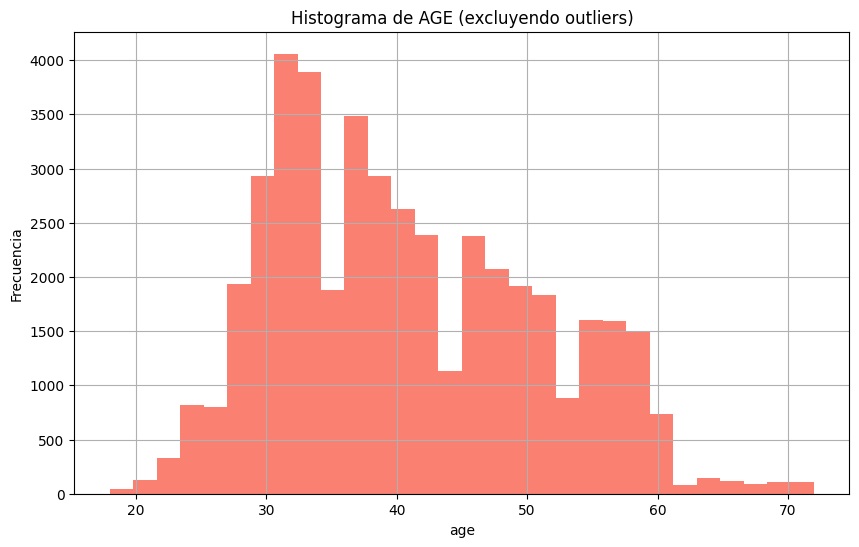

In [50]:
plot_histogram("age")

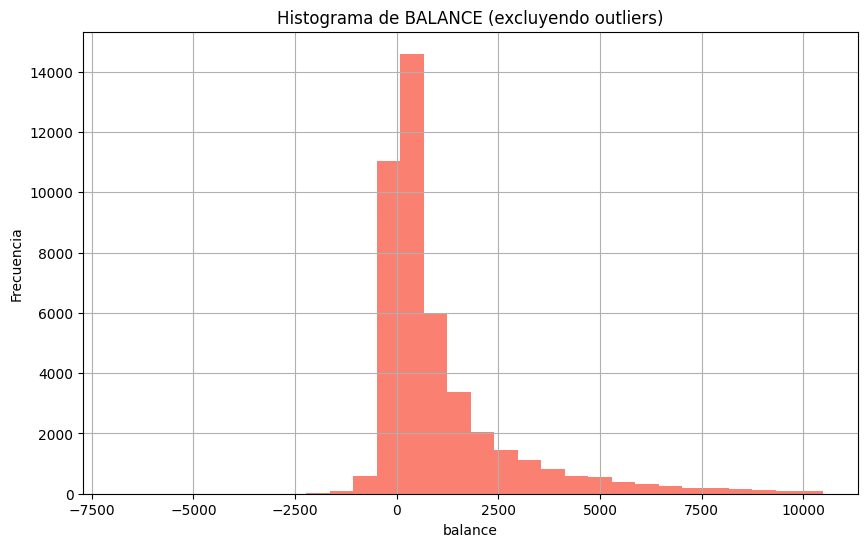

In [51]:
plot_histogram("balance")

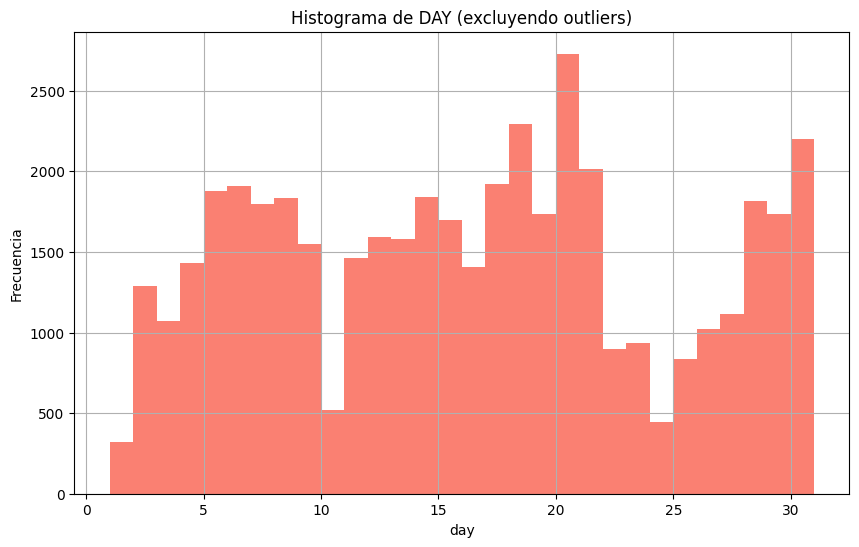

In [52]:
plot_histogram("day")

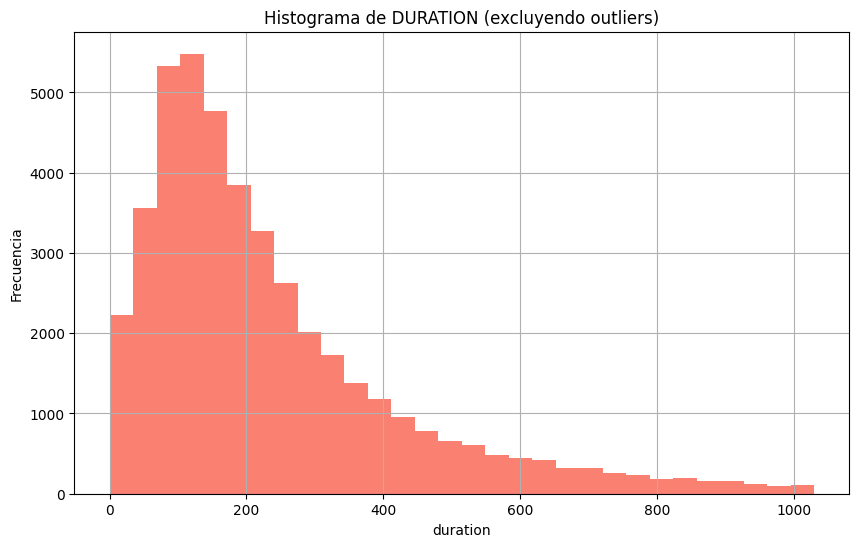

In [53]:
plot_histogram("duration")

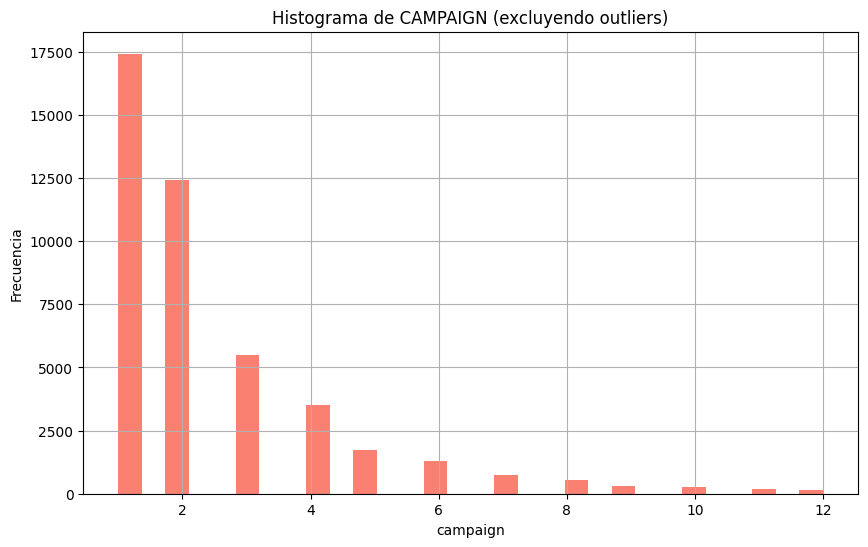

In [54]:
plot_histogram("campaign")

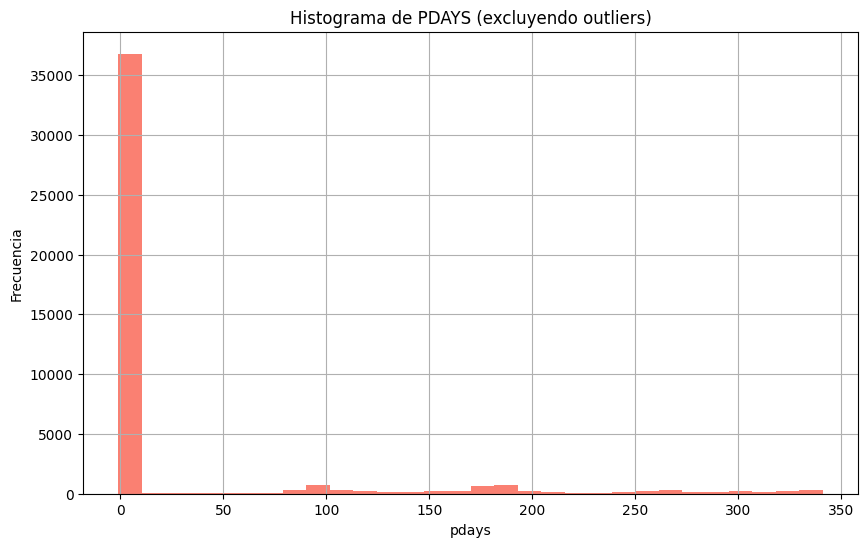

In [55]:
plot_histogram("pdays")

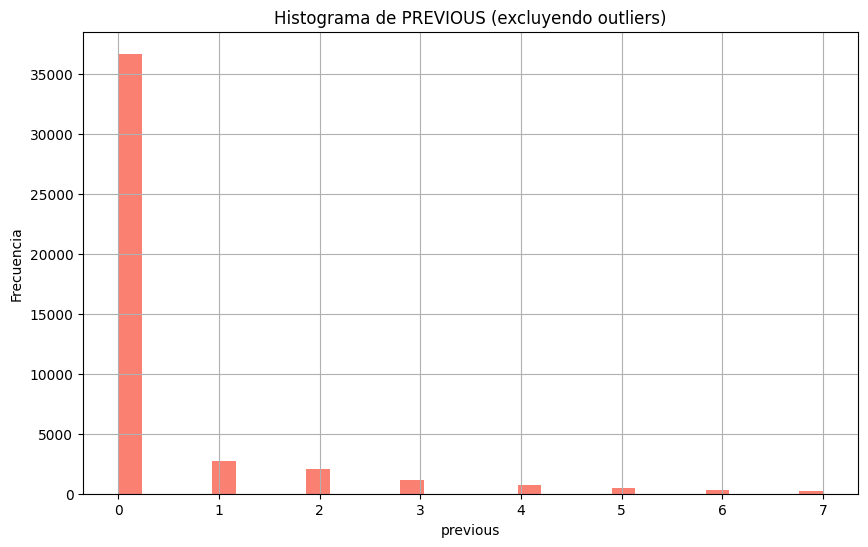

In [56]:
plot_histogram("previous")

### 8. Visualización de variables categóricas




In [57]:
def plot_categorical_histogram(column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Gráfico de barras de {column.upper()}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [58]:
#Seleccionar las columnas no numéricas
df.select_dtypes(exclude=['number']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome', 'y'],
      dtype='object')

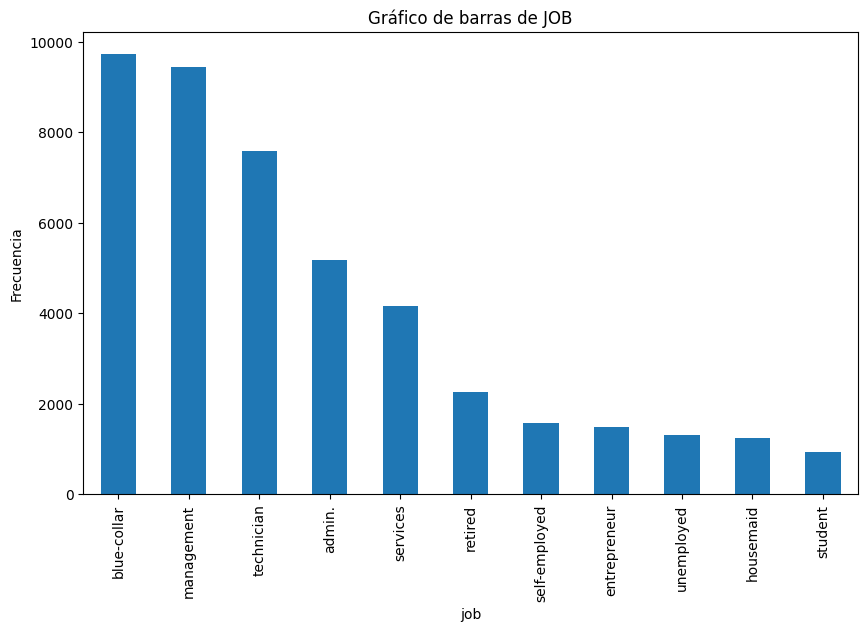

In [59]:
plot_categorical_histogram("job")

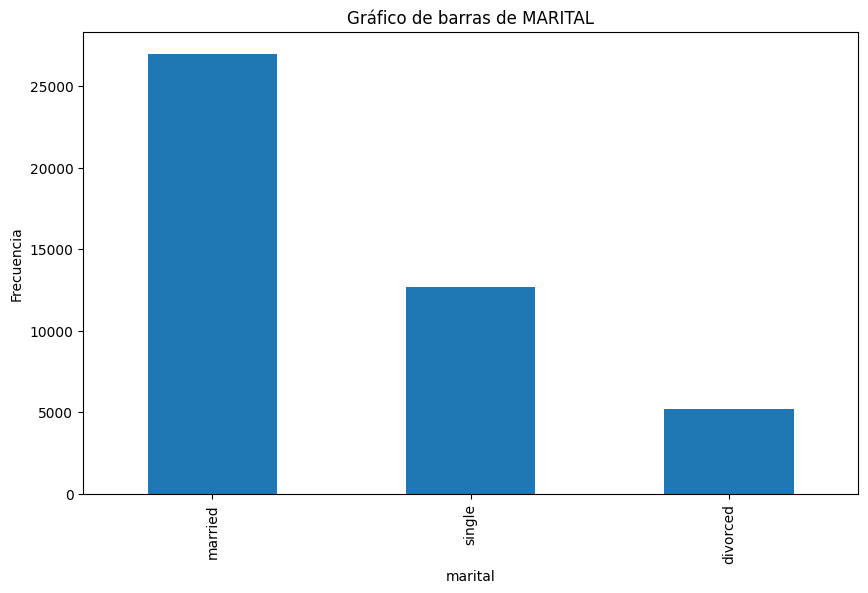

In [60]:
plot_categorical_histogram("marital")

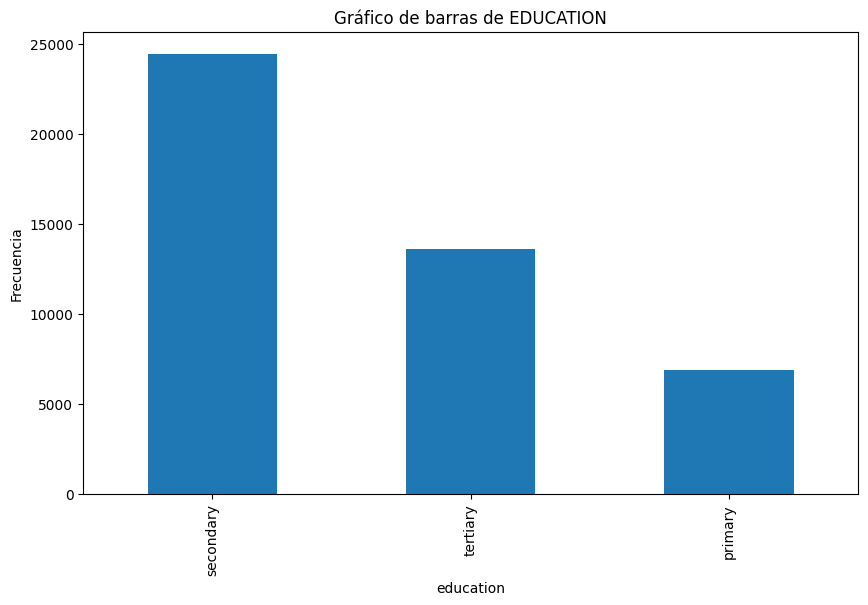

In [61]:
plot_categorical_histogram("education")

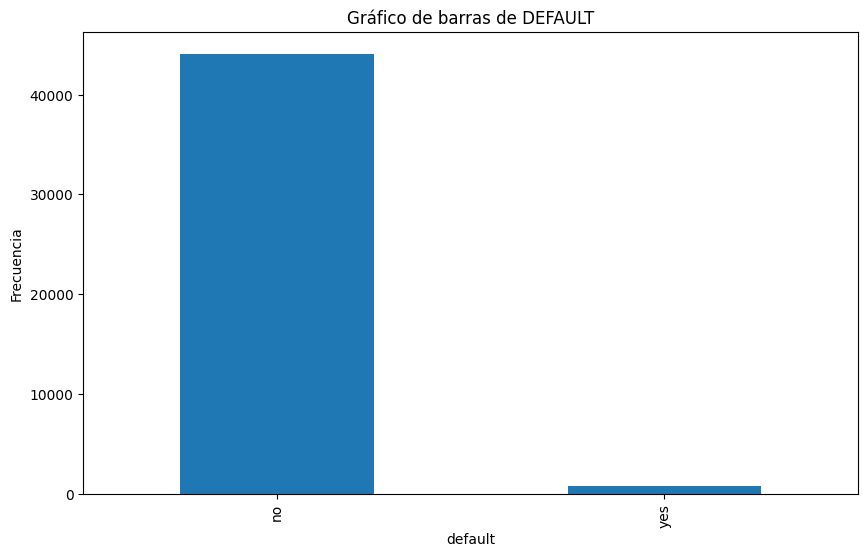

In [62]:
plot_categorical_histogram("default")

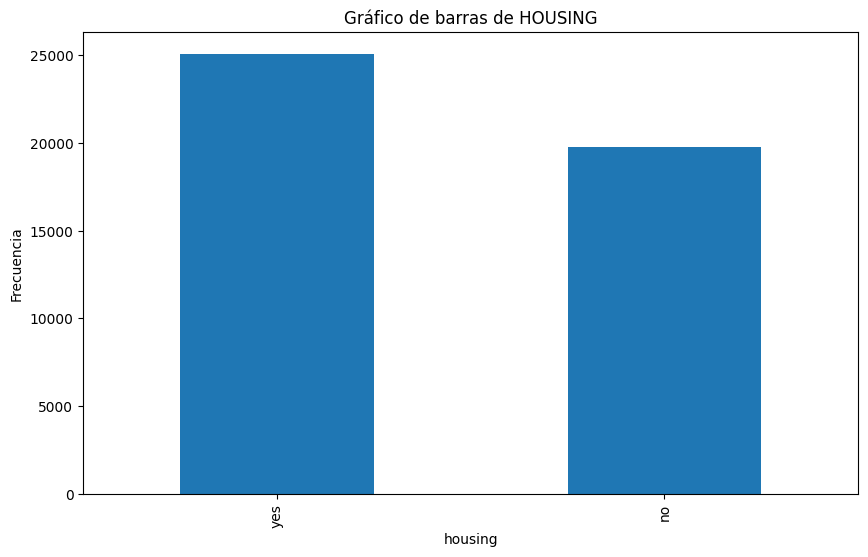

In [63]:
plot_categorical_histogram("housing")

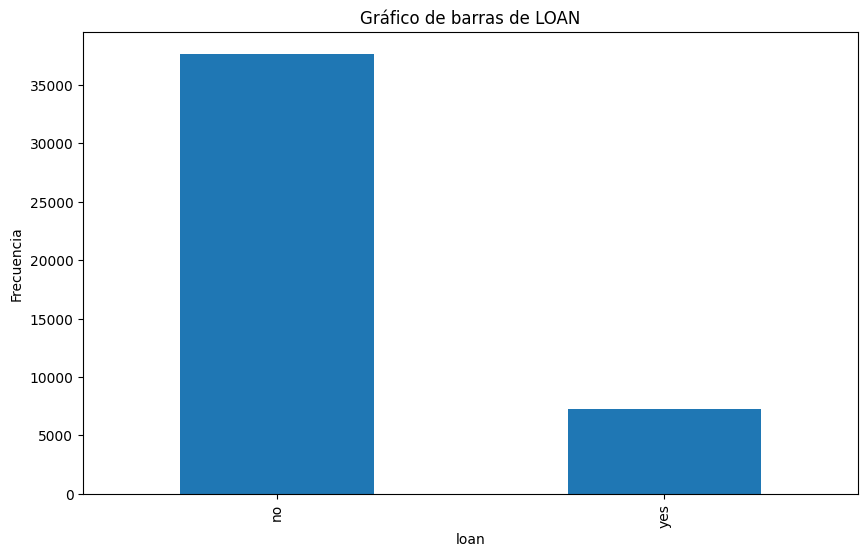

In [64]:
plot_categorical_histogram("loan")

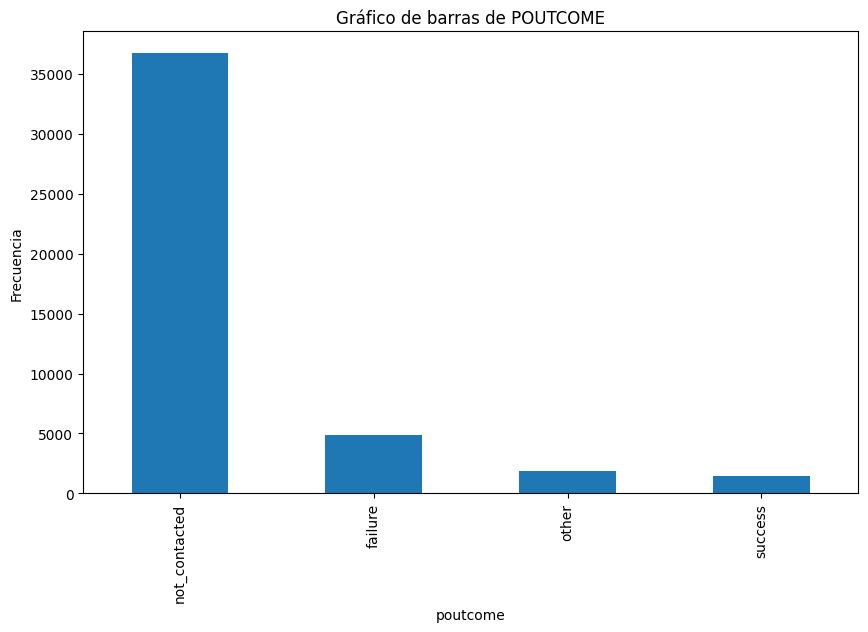

In [65]:
plot_categorical_histogram("poutcome")

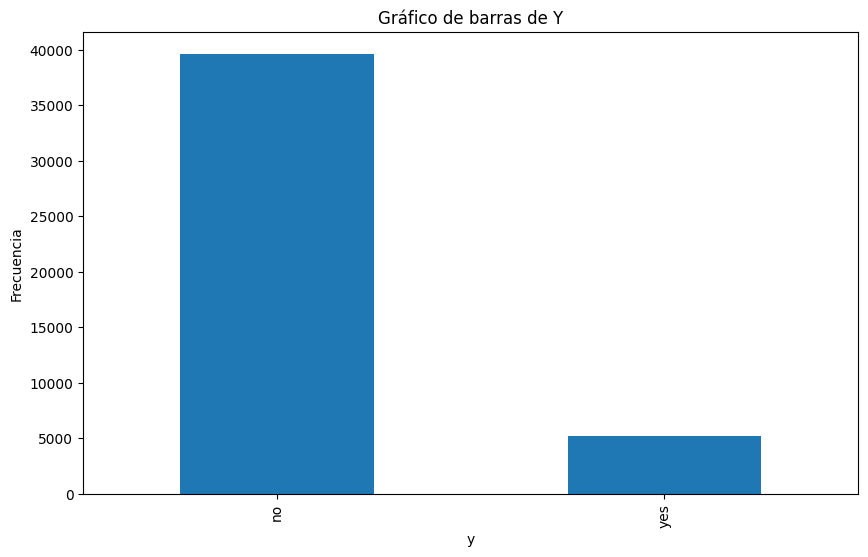

In [66]:
plot_categorical_histogram("y")

Gráfico de barras de la variable Mes (Month)

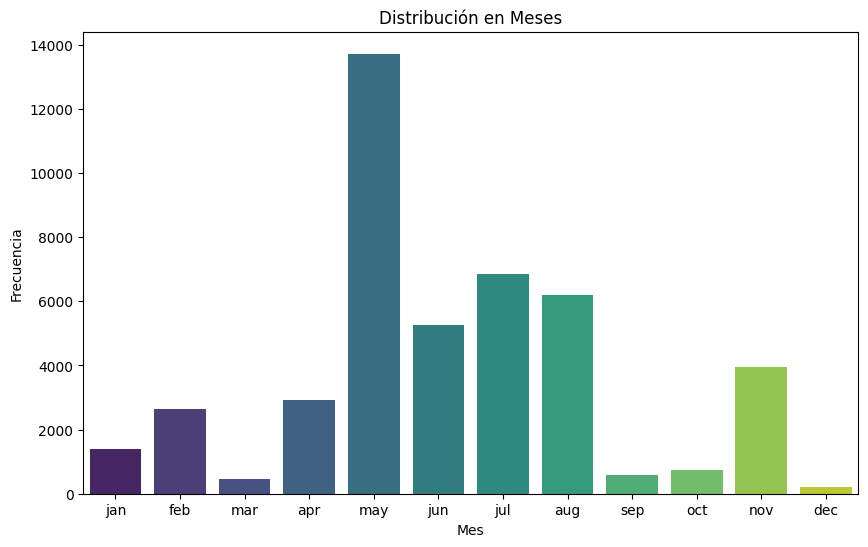

In [67]:
month_order = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
               'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}


df['month_num'] = df['month'].map(month_order)
df_sorted = df.sort_values('month_num')


plt.figure(figsize=(10, 6))
sns.countplot(data=df_sorted, x='month', hue='month', palette='viridis', legend=False)
plt.title('Distribución en Meses')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

### 9. Nuevas variables

In [71]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '91-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [72]:
df['age_group'].value_counts()

,count
age_group,
30-39,17988
40-49,11576
50-59,8331
20-29,5195
60-69,1210
70-79,416
80-89,121
91-99,9


El grupo de edad más popular en nuestro dataset de clientes es de 30 a 39 años, mientras que de 91 a 099 años sólo hay 9 clientes.

<ipython-input-73-29d375dc196c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette=sns.color_palette("pastel"))
<ipython-input-73-29d375dc196c>:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.countplot(x='age_group', data=df, palette=sns.color_palette("pastel"))


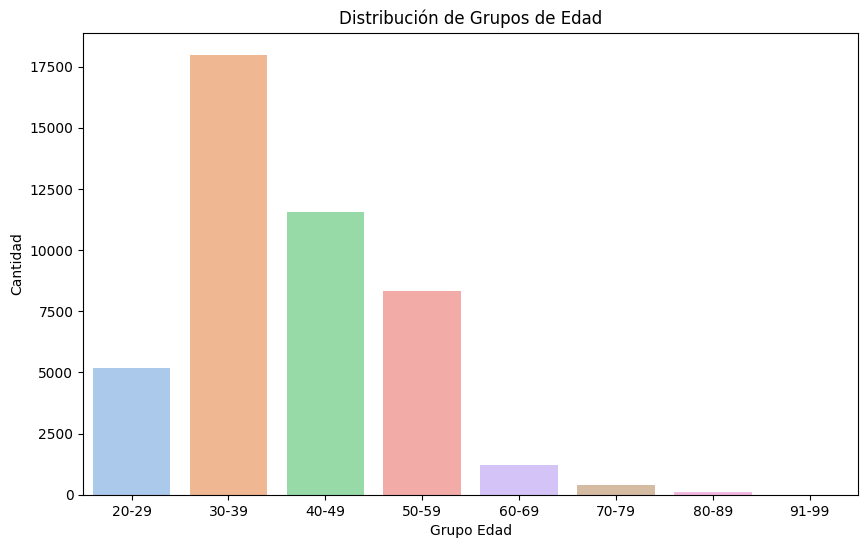

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette=sns.color_palette("pastel"))
plt.title('Distribución de Grupos de Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Cantidad')
plt.show()

# **Modelización**

### Función Cross Validation

In [74]:
training_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [75]:
def kk_crossvalidation(times=1, k=3, training_set=None, method=None, p=None, kn=1,
                       type=None, kernel=None, C=1, nu=0.2, sigma=None, degree=1,
                       scale=1, offset=1, class_weights=None, max_depth=None, min_samples_split=None,
                       min_samples_leaf=None, max_features=None, criterion=None, alpha=None, penalty=None,
                       hidden_layer_sizes=(100,), activation='relu', solver='adam', learning_rate='constant'):

    errors = []
    kf = KFold(n_splits=k)

    for _ in range(times):
        fold_errors = []
        for train_index, val_index in kf.split(training_set):
            training_data = training_set.iloc[train_index]
            validation_data = training_set.iloc[val_index]

            if method == "knn":
                fold_errors.append(knn_fun(training_data, validation_data, k=kn))
            elif method == "Naive Bayes":
                fold_errors.append(naive_bayes_fun(training_data, validation_data, p, alpha))
            elif method == "Decision Trees":
                fold_errors.append(tree_fun(training_data, validation_data, max_depth, min_samples_split, min_samples_leaf, max_features, criterion))
            elif method == "KSVM":
                fold_errors.append(ksvm_fun(training_data, validation_data, type, kernel, C, nu, degree, scale, offset, class_weights))
            elif method == "Logistic Regression":
                fold_errors.append(logistic_regression_fun(training_data, validation_data, C, penalty))
            elif method == "Neural Network":
              fold_errors.append(nn_fun(training_data, validation_data, hidden_layer_sizes, activation, solver, alpha,learning_rate))


        errors.append(np.mean(fold_errors, axis=0))

    return np.mean(errors, axis=0)

Esta función evalúa el rendimiento de los métodos de aprendizaje automático extrayendo métricas de evaluación de la matriz de confusión proporcionada. Devuelve el porcentaje de error total (es decir, la proporción de clases correctamente predichas de todos los puntos de datos), el porcentaje de falsos negativos (es decir, el número de instancias que son relevantes y que el modelo identificó incorrectamente como no relevantes) y el porcentaje de falsos positivos (es decir, el número de instancias que no son relevantes pero que el modelo identificó incorrectamente como relevantes) para la matriz de confusión dada.


In [76]:
def err_fun(confusion_matrix):
    total_err = round((confusion_matrix[1, 0] + confusion_matrix[0, 1]) / np.sum(confusion_matrix) * 100, 2)
    false_neg = round((confusion_matrix[1, 0]) / (confusion_matrix[1, 0] + confusion_matrix[1, 1]) * 100, 2)
    false_pos = round((confusion_matrix[0, 1]) / (confusion_matrix[0, 0] + confusion_matrix[0, 1]) * 100, 2)

    return np.array([total_err, false_neg, false_pos])

Aqui implementamos cada modelo.

### Decision Tree

In [77]:
def tree_fun(training_set, validation_set, max_depth, min_samples_split, min_samples_leaf, max_features, criterion):
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
    numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    # Transformación de datos
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    X_train = training_set.drop(columns=['y'])
    y_train = training_set['y']
    X_valid = validation_set.drop(columns=['y'])
    y_valid = validation_set['y']

    X_train = preprocessor.fit_transform(X_train)
    X_valid = preprocessor.transform(X_valid)

    dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion)

    dtc.fit(X_train, y_train)

    y_pred = dtc.predict(X_valid)

    confusion_mat = confusion_matrix(y_valid, y_pred)

    return err_fun(confusion_mat)

In [78]:
param_grid = {
    'max_depth': np.arange(1, 11, 1),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

best_error = None
best_params = {}

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for max_features in param_grid['max_features']:
                for criterion in param_grid['criterion']:
                    error = kk_crossvalidation(
                        training_set=training_set,
                        method="Decision Trees",
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        criterion=criterion
                    )
                    if best_error is None or error[0] < best_error[0]:
                        best_error = error
                        best_params = {
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features,
                            'criterion': criterion
                        }

print(f"Mejores parámetros: {best_params}")
print(f"Mejor error: {best_error}")

Mejores parámetros: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'criterion': 'entropy'}
Mejor error: [ 9.79       65.61666667  2.49666667]


Confusion Matrix:


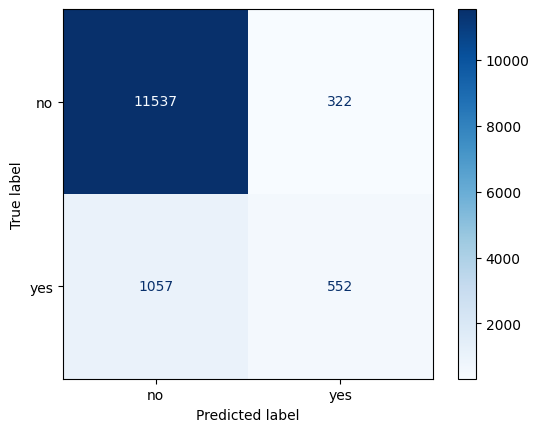


Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11859
         yes       0.63      0.34      0.44      1609

    accuracy                           0.90     13468
   macro avg       0.77      0.66      0.69     13468
weighted avg       0.88      0.90      0.88     13468



In [79]:
# Evaluación en el conjunto de prueba con los mejores parámetros
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train = training_set.drop(columns=['y'])
y_train = training_set['y']
X_test = test_set.drop(columns=['y'])
y_test = test_set['y']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

clf = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    criterion=best_params['criterion']
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión y el report de clasificación
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

### Naive Bayes

In [80]:
def naive_bayes_fun(training_set, validation_set, p, alpha):
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
    numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    # Transformación de datos
    preprocessor = ColumnTransformer(
        transformers=[
            ('num',MinMaxScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    # Extraer las características y las etiquetas de entrenamiento y validación
    X_train = training_set.drop(columns=['y'])
    y_train = training_set['y']
    X_valid = validation_set.drop(columns=['y'])
    y_valid = validation_set['y']

    X_train = preprocessor.fit_transform(X_train)
    X_valid = preprocessor.transform(X_valid)

    # Inicializar el clasificador Naive Bayes Multinomial con los parámetros dados
    mnb = MultinomialNB(class_prior=p, alpha=alpha)

    # Entrenar el modelo Naive Bayes con el conjunto de entrenamiento
    mnb.fit(X_train, y_train)

    # Predecir las clases para el conjunto de validación
    y_pred = mnb.predict(X_valid)

    # Calcular la matriz de confusión entre las predicciones y las etiquetas verdaderas
    confusion_mat = confusion_matrix(y_valid, y_pred)

    # Calcular y devolver las métricas de evaluación utilizando la función err_fun
    return err_fun(confusion_mat)

In [81]:
alpha_values = np.arange(0.1, 5, 0.1)
class_prior_values = np.arange(0.1, 1.0, 0.05)

best_error = None
best_params = None

# Realizamos la optimización de parámetros utilizando cross-validation
for alpha in alpha_values:
      for p in class_prior_values:
          error = kk_crossvalidation(training_set=training_set, method="Naive Bayes", alpha=alpha, p = [1-p, p])
          if best_error is None or error[0] < best_error[0]:
              best_error = error
              best_params = (alpha, p)

print(f"Mejores parámetros: {best_params}")
print(f"Mejor error: {best_error}")

Mejores parámetros: (3.4000000000000004, 0.1)
Mejor error: [10.89       75.39        2.45333333]


Confusion Matrix:


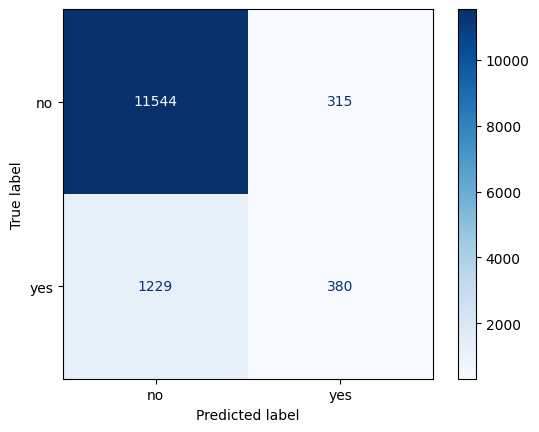


Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.97      0.94     11859
         yes       0.55      0.24      0.33      1609

    accuracy                           0.89     13468
   macro avg       0.73      0.60      0.63     13468
weighted avg       0.86      0.89      0.86     13468



In [82]:
# Evaluación en el conjunto de prueba con los mejores parámetros
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train = training_set.drop(columns=['y'])
y_train = training_set['y']
X_test = test_set.drop(columns=['y'])
y_test = test_set['y']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

mnb = MultinomialNB(
    alpha=best_params[0],
    class_prior=[1-best_params[1], best_params[1]]
)

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

# Calcular la matriz de confusión y el report de clasificación
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mnb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

### KNN

In [87]:
def knn_fun(training_set, validation_set, k):
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
    numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    # Transformación de datos
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    X_train = training_set.drop(columns=['y'])
    y_train = training_set['y']
    X_valid = validation_set.drop(columns=['y'])
    y_valid = validation_set['y']

    X_train = preprocessor.fit_transform(X_train)
    X_valid = preprocessor.transform(X_valid)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)
    confusion_mat = confusion_matrix(y_valid, y_pred)

    return accuracy, err_fun(confusion_mat)

def err_fun(confusion_mat):
    tn, fp, fn, tp = confusion_mat.ravel()
    return (fn + fp) / (tn + fp + fn + tp)  # tasa de error

In [88]:
def search_best_knn_k(k_values, times, training_set):
    best_k = None
    best_error = float('inf')
    best_accuracy = 0

    for k in k_values:
        error = kk_crossvalidation(times=times, k=5, training_set=training_set, method="knn", kn=k)
        if error[1] < best_error:
            best_error = error[1]
            best_accuracy = error[0]
            best_k = k

    return best_k, best_error, best_accuracy

In [89]:
from sklearn.neighbors import KNeighborsClassifier
k_values = np.arange(1, 100, 4)  # rango de valores de k a probar
best_k, best_error, best_accuracy = search_best_knn_k(k_values=k_values, times=5, training_set=training_set)
print(f"El mejor valor de k es {best_k} con un error de {best_error:.4f} y una precisión de {best_accuracy:.4f}")

El mejor valor de k es 17 con un error de 0.1013 y una precisión de 0.8987


In [ ]:
# Evaluación en el conjunto de prueba con los mejores parámetros
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])
X_train = training_set.drop(columns=['y'])
y_train = training_set['y']
X_test = test_set.drop(columns=['y'])
y_test = test_set['y']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la matriz de confusión y el reporte de clasificación
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

### Logistic Regression

In [90]:
def logistic_regression_fun(training_set, validation_set, C, penalty):
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
    numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    # Transformación de datos
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    X_train = training_set.drop(columns=['y'])
    y_train = training_set['y']
    X_valid = validation_set.drop(columns=['y'])
    y_valid = validation_set['y']

    X_train = preprocessor.fit_transform(X_train)
    X_valid = preprocessor.transform(X_valid)

    logreg = LogisticRegression(C=C, penalty=penalty, max_iter=1000)
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)
    confusion_mat = confusion_matrix(y_valid, y_pred)

    return accuracy, err_fun(confusion_mat)


In [91]:
def search_best_logistic_regression(C_values, penalty_values, times, training_set):
    best_C = None
    best_error = float('inf')
    best_accuracy = 0

    for C in C_values:
      for penalty in penalty_values:
        error = kk_crossvalidation(times=times, penalty=penalty, k=5, training_set=training_set, method="Logistic Regression", C=C)
        if error[1] < best_error:
            best_error = error[1]
            best_accuracy = error[0]
            best_C = C
            best_penalty = penalty

    return best_C, best_error, best_accuracy, best_penalty

In [92]:
# Definir el rango de valores de C a probar
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
penalty_values = ["l2", "none"]
best_C, best_error, best_accuracy, best_penalty = search_best_logistic_regression(C_values=C_values, penalty_values = penalty_values, times=5, training_set=training_set)
print(f"El mejor valor de C es {best_C} con una penalty {best_penalty} y con un error de {best_error:.4f} y una precisión de {best_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will igno

El mejor valor de C es 1 con una penalty l2 y con un error de 0.0976 y una precisión de 0.9024


Confusion Matrix:


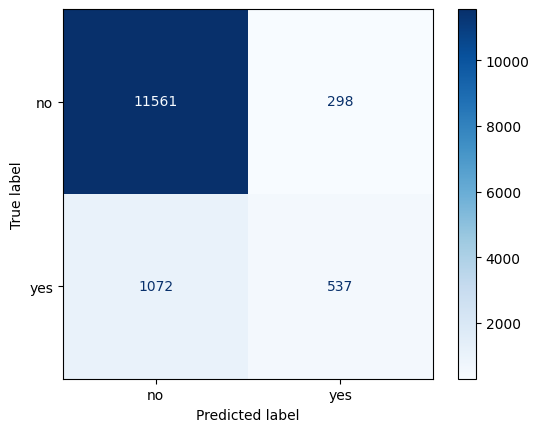


Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11859
         yes       0.64      0.33      0.44      1609

    accuracy                           0.90     13468
   macro avg       0.78      0.65      0.69     13468
weighted avg       0.88      0.90      0.88     13468



In [93]:
# Evaluación en el conjunto de prueba con los mejores parámetros
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])
X_train = training_set.drop(columns=['y'])
y_train = training_set['y']
X_test = test_set.drop(columns=['y'])
y_test = test_set['y']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

lin_red = LogisticRegression(C=best_C, penalty=best_penalty)
lin_red.fit(X_train, y_train)
y_pred = lin_red.predict(X_test)

# Calcular la matriz de confusión y el reporte de clasificación
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=lin_red.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

### SVM

In [94]:
# Clasificar variables categóricas y numéricas
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Preprocesador que estandariza las características numéricas y codifica las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear el pipeline que integra el preprocesamiento y el modelo SVM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC(max_iter=1000))
])

# Definir hiperparámetros
param_dist = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# RandomizedSearchCV para la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(training_set.drop(columns=['y']), training_set['y'])

# Obtener los mejores parámetros y accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(random_search.best_score_))

# Evaluar en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(test_set.drop(columns=['y']))

# Accuracy y error
accuracy = accuracy_score(test_set['y'], y_pred)
confusion_mat = confusion_matrix(test_set['y'], y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Error Rate: {err_fun(confusion_mat):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters:  {'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 10}
Best Cross-Validation Accuracy: 0.7883
Test Accuracy: 0.8210
Test Error Rate: 0.1790


Confusion Matrix:


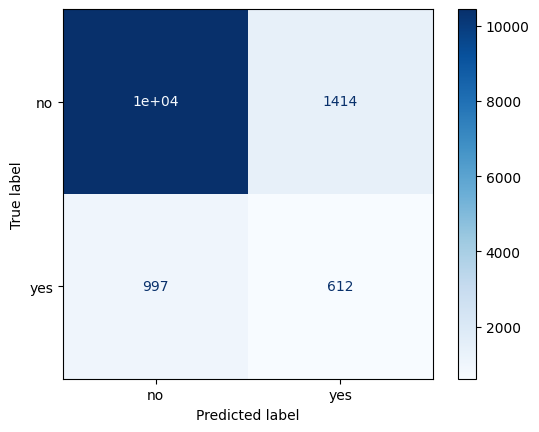


Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.88      0.90     11859
         yes       0.30      0.38      0.34      1609

    accuracy                           0.82     13468
   macro avg       0.61      0.63      0.62     13468
weighted avg       0.84      0.82      0.83     13468



In [95]:
# Mostrar la matriz de confusión
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=best_model.named_steps['svm'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Mostrar el reporte de clasificación
classification_rep = classification_report(test_set['y'], y_pred)
print("\nClassification Report:")
print(classification_rep)

### Neural Network

In [100]:
def nn_fun(training_set, validation_set, hidden_layer_sizes, activation, solver, alpha, learning_rate):
    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
    numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

    # Transformación de datos
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    X_train = training_set.drop(columns=['y'])
    y_train = training_set['y']
    X_valid = validation_set.drop(columns=['y'])
    y_valid = validation_set['y']

    X_train = preprocessor.fit_transform(X_train)
    X_valid = preprocessor.transform(X_valid)

    # Definir el modelo de la red neuronal
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        max_iter=1000,
        random_state=42
    )

    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_valid)

    confusion_mat = confusion_matrix(y_valid, y_pred)

    return err_fun(confusion_mat)

In [101]:
# Parámetros para la red neuronal
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

best_error = None
best_params = {}

for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for solver in param_grid['solver']:
            for alpha in param_grid['alpha']:
                error = kk_crossvalidation(
                    training_set=training_set,
                    method="Neural Network",
                    hidden_layer_sizes=hidden_layer_sizes,
                    solver=solver,
                    alpha=alpha
                )
                if best_error is None or error < best_error:
                    best_error = error
                    best_params = {
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'solver': solver,
                        'alpha': alpha,
                    }

print(f"Mejores parámetros: {best_params}")
print(f"Mejor error: {best_error}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Mejores parámetros: {'hidden_layer_sizes': (100,), 'solver': 'sgd', 'alpha': 0.0001}
Mejor error: 0.09740957075359846


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:


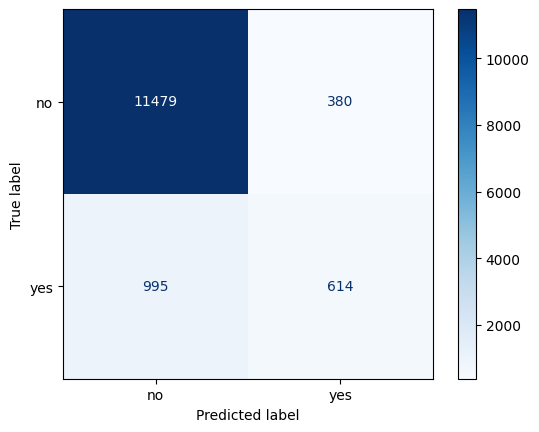


Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11859
         yes       0.62      0.38      0.47      1609

    accuracy                           0.90     13468
   macro avg       0.77      0.67      0.71     13468
weighted avg       0.88      0.90      0.89     13468



In [102]:
# Evaluación en el conjunto de prueba con los mejores parámetros
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train = training_set.drop(columns=['y'])
y_train = training_set['y']
X_test = test_set.drop(columns=['y'])
y_test = test_set['y']

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Definir y entrenar el modelo MLP con los mejores parámetros encontrados
mlp = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Calcular la matriz de confusión y el report de clasificación
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

# Comparación Modelos Finales

### Cross Validation

In [103]:
#Decision Tree
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1': make_scorer(f1_score, pos_label='yes'),
    'roc_auc': 'roc_auc'
}

cv_results = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
print("Decision Tree")
for metric in scoring:
    mean_score = np.mean(cv_results['test_' + metric])
    std_score = np.std(cv_results['test_' + metric])
    print(f"{metric.capitalize()}:")
    print(f"  Media: {mean_score:.4f}")
    print(f"  Desviación estándar: {std_score:.4f}")

#Red Neuronal
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1': make_scorer(f1_score, pos_label='yes'),
    'roc_auc': 'roc_auc'
}

cv_results = cross_validate(mlp, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
print("Multi-Layer Perceptron")
for metric in scoring:
    mean_score = np.mean(cv_results['test_' + metric])
    std_score = np.std(cv_results['test_' + metric])
    print(f"{metric.capitalize()}:")
    print(f"  Media: {mean_score:.4f}")
    print(f"  Desviación estándar: {std_score:.4f}")

Decision Tree
Accuracy:
  Media: 0.9020
  Desviación estándar: 0.0022
Precision:
  Media: 0.6398
  Desviación estándar: 0.0170
Recall:
  Media: 0.3476
  Desviación estándar: 0.0162
F1:
  Media: 0.4503
  Desviación estándar: 0.0163
Roc_auc:
  Media: 0.8578
  Desviación estándar: 0.0057
Multi-Layer Perceptron
Accuracy:
  Media: 0.9031
  Desviación estándar: 0.0010
Precision:
  Media: 0.6367
  Desviación estándar: 0.0131
Recall:
  Media: 0.3793
  Desviación estándar: 0.0174
F1:
  Media: 0.4749
  Desviación estándar: 0.0109
Roc_auc:
  Media: 0.9092
  Desviación estándar: 0.0055


### Curva ROC

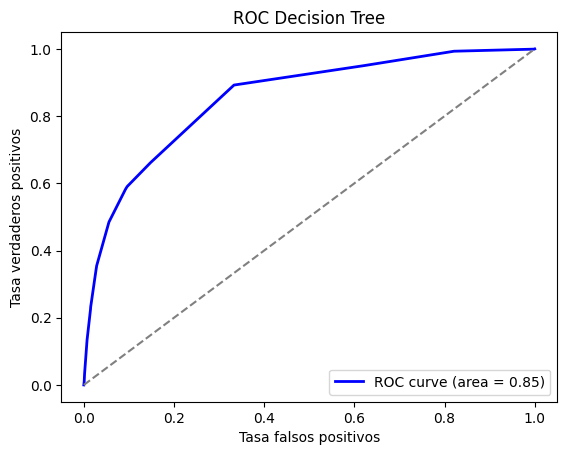

In [104]:
y_test_bin = label_binarize(y_test, classes=['no', 'yes'])
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa verdaderos positivos')
plt.title('ROC Decision Tree')
plt.legend(loc='lower right')
plt.show()

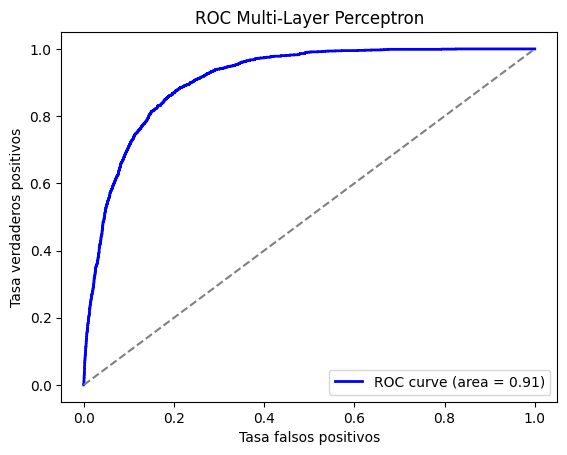

In [105]:
y_test_bin = label_binarize(y_test, classes=['no', 'yes'])
y_pred_prob = mlp.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Tasa falsos positivos')
plt.ylabel('Tasa verdaderos positivos')
plt.title('ROC Multi-Layer Perceptron')
plt.legend(loc='lower right')
plt.show()